Exercício 1 –  A partir da base de dados 1 - propaganda.csv Download 1 - propaganda.csv faça um modelo de regressão múltipla para predizer as vendas:
1 – Análise descritiva
2 – Calculo de correlação e covariância
3 – Faça o modelo de regressão
4 – Realize a análise de resíduos
5 – Análise de multicolinearidade
6 – Análise do Modelo

Exercício 2 - Faça 3 modelos de regressão linear múltipla para predizer da melhor forma possível o preço dos automóveis.
preco_carro.csvDownload preco_carro.csv
1º Modelo com todas variáveis
2º Modelo com as 3 variáveis mais correlacionadas
3º Modelo com as 5 variáveis mais correlacionadas
   
Na análise de dados e do modelo devem contemplar:
1 – Análise descritiva
2 – Calculo de correlação e covariância
3 – Faça o modelo de regressão
4 – Realize a análise de resíduos
5 – Análise de multicolinearidade
6 – Análise de outlier
7 – Comparação de modelos


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('1 - propaganda.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


               TV       Radio      Jornal      Vendas
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


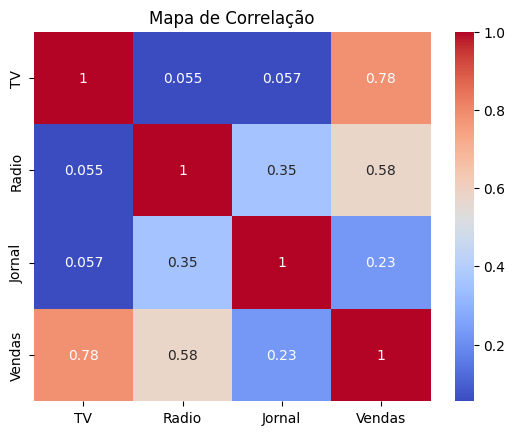

In [3]:
print(df.describe())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


X = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

modelo = sm.OLS(y_train, X_train_const).fit()

print("--- Resumo do Treino ---")
print(modelo.summary())

y_pred = modelo.predict(X_test_const)

print("\n--- Avaliação no Conjunto de Teste ---")

r2_teste = r2_score(y_test, y_pred)
print(f"R² no Teste: {r2_teste:.4f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Erro médio): {rmse:.4f}")

--- Resumo do Treino ---
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.88e-69
Time:                        23:03:59   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      

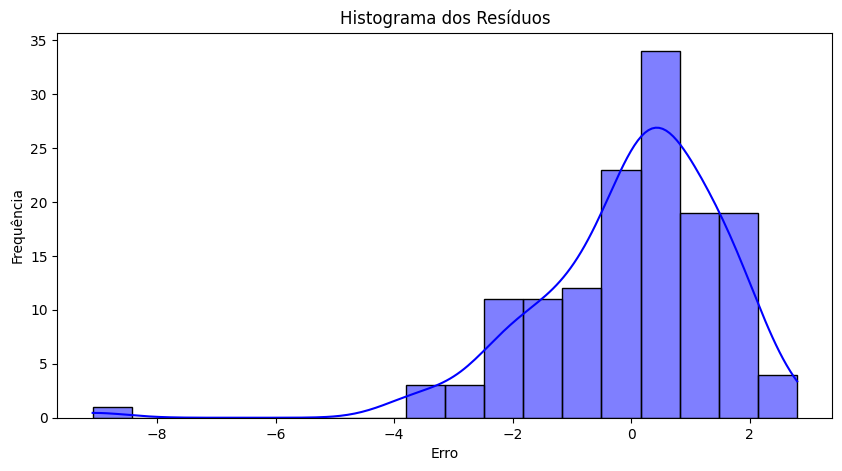

P-valor de Normalidade: 0.0000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

residuos = modelo.resid
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()

stat, p_valor = stats.shapiro(residuos)
print(f"P-valor de Normalidade: {p_valor:.4f}")

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\n--- Tabela de Multicolinearidade (VIF) ---")
print(vif_data)


--- Tabela de Multicolinearidade (VIF) ---
  Variável       VIF
0       TV  2.486772
1    Radio  3.285462
2   Jornal  3.055245



--- Performance no Teste ---
R² (Precisão): 0.8609
RMSE (Erro Médio): 1.9485


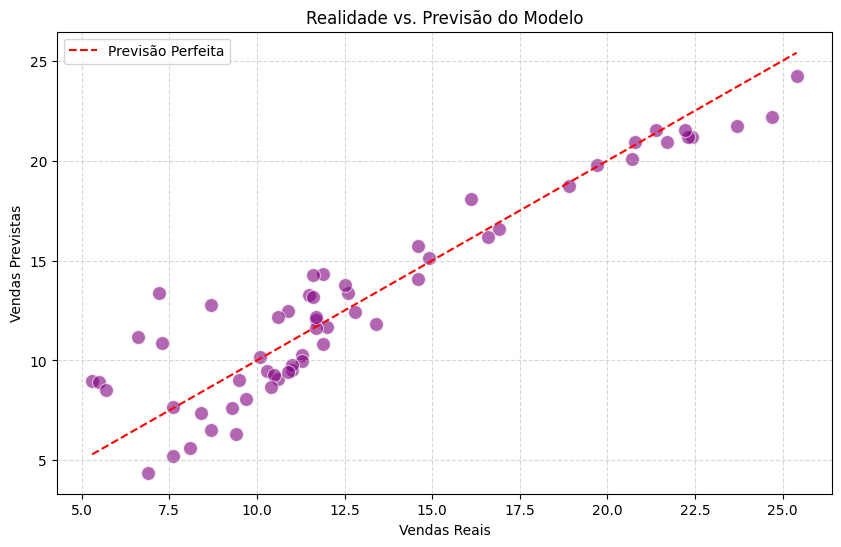

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = modelo.predict(X_test_const)

r2_teste = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Performance no Teste ---")
print(f"R² (Precisão): {r2_teste:.4f}")
print(f"RMSE (Erro Médio): {rmse:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, s=100, color='purple', alpha=0.6)

linha_ideal = np.linspace(min(y_test), max(y_test), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', label='Previsão Perfeita')

plt.title('Realidade vs. Previsão do Modelo')
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1 – Análise descritiva

TV -> Quantitativa Contínua
RADIO -> Quantitativa Contínua
JORNAL -> Quantitativa Contínua
VENDAS -> Quantitativa Contínua

A empresa tem um investimento muito maior em TV's, além disso o investimento varia muito mês a mês para TV's, o que pode indicar períodos mais agressivos de investimentos.

2 – Calculo de correlação e covariância

A correlação entre Vendas e TV's é forte e positiva, quando a altos investimentos em TV's as Vendas sobem
Rádio e Vendas, correlação média
Jornal e Vendas, correlação baixa, o investimento em Jornal não influencia no aumento das vendas

3 – Faça o modelo de regressão
Feito

4 – Realize a análise de resíduos
Análise da Hipotese Nula
H0 - Os residuos são normalmente distribuidos
H1 - Os residuos não são normalmente distribuidos

Como o P Valor é infimo, rejeitamos H0, e assim como o gráfico mostra, existe assimetria, cauda longa e outliers


5 – Análise de multicolinearidade
Não a multicolinearidade preocupante, sendo assim não existe preocupação de distorção de resultados


6 – Análise do Modelo

O R2 explica 86% da variação de vendas com erro médio baixo de 1.9485. Podemos afirmar que o modelo é bom para prever as vendas, apesar dos residuos não serem normais.

In [8]:
t_values = modelo.tvalues
p_values = modelo.pvalues

print("Valores t:\n", t_values)
print("\nP-valores:\n", p_values)

print(modelo.summary())

modelo.conf_int(alpha=0.05)

Valores t:
 const      7.249607
TV        27.218741
Radio     20.195498
Jornal     0.988001
dtype: float64

P-valores:
 const     2.848109e-11
TV        6.788687e-57
Radio     9.192647e-43
Jornal    3.249067e-01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.88e-69
Time:                        23:04:00   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                         

,0,1
const,1.969997,3.447901
TV,0.040858,0.047260
Radio,0.179773,0.218802
Jornal,-0.006893,0.020658


Exercício 2 - Faça 3 modelos de regressão linear múltipla para predizer da melhor forma possível o preço dos automóveis.
preco_carro.csvDownload preco_carro.csv
1º Modelo com todas variáveis
2º Modelo com as 3 variáveis mais correlacionadas
3º Modelo com as 5 variáveis mais correlacionadas
   
Na análise de dados e do modelo devem contemplar:
1 – Análise descritiva
2 – Calculo de correlação e covariância
3 – Faça o modelo de regressão
4 – Realize a análise de resíduos
5 – Análise de multicolinearidade
6 – Análise de outlier
7 – Comparação de modelos


v.id -> Qualitativa Nominal
on road old -> Quantitativa Contínua
on road now -> Quantitativa Discreta
years -> Quantitativa Contínua
km -> Quantitativa Contínua
rating -> Qualitativa Ordinal
condition -> Qualitativa Ordinal
economy -> Quantitativa Contínua
top speed -> Quantitativa Contínua
hp -> Quantitativa Contínua
torque -> Quantitativa Contínua
current price -> Quantitativa Contínua

In [9]:
df = pd.read_csv(r'preco_carro.csv')
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [17]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


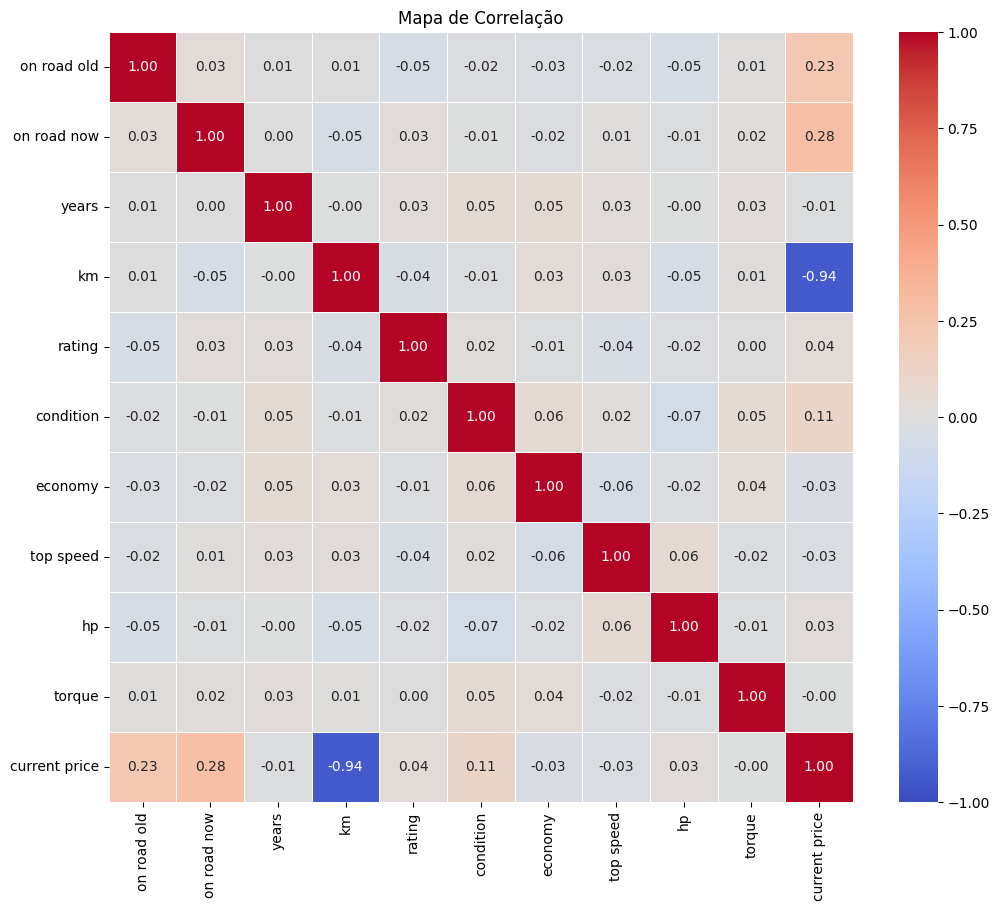

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

df_limpo = df.drop(columns=['v.id'], errors='ignore')
corr = df_limpo.corr()

sns.heatmap(
    corr, 
    annot=True,      
    fmt=".2f",        
    cmap='coolwarm', 
    linewidths=0.5,   
    vmin=-1, vmax=1    
)

plt.title("Mapa de Correlação")
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

alvo = 'current price'
df_limpo = df.drop(columns=['v.id'], errors='ignore')

correlacoes = df_limpo.corr()[alvo].abs().sort_values(ascending=False)
features_ordenadas = correlacoes.drop(alvo).index.tolist()

print("--- Ranking de Importância (Correlação) ---")
print(correlacoes.drop(alvo).head(10))

features_todas = features_ordenadas
features_top3 = features_ordenadas[:3] 
features_top5 = features_ordenadas[:5] 

print(f"\nTop 3 variáveis: {features_top3}")
print(f"Top 5 variáveis: {features_top5}")

--- Ranking de Importância (Correlação) ---
km             0.935924
on road now    0.282793
on road old    0.233035
condition      0.110108
rating         0.035038
economy        0.034711
hp             0.030238
top speed      0.027993
years          0.011854
torque         0.002290
Name: current price, dtype: float64

Top 3 variáveis: ['km', 'on road now', 'on road old']
Top 5 variáveis: ['km', 'on road now', 'on road old', 'condition', 'rating']


Iniciando bateria de testes...

==================== Modelo 1 (Todas) ====================

>> Análise de Multicolinearidade (VIF):
       Feature         VIF
1  on road now  120.706875
2  on road old   83.201308
7    top speed   64.530536
5      economy   26.539267
9       torque   24.281683
6           hp   17.378673
0           km   12.540514
8        years    8.056407
4       rating    5.493181
3    condition    4.963925

>> Performance do Modelo:
R² (Explicação): 0.9950
R² Ajustado (Para Comparação): 0.9948
RMSE (Erro Médio): 8826.52
Outliers detectados nos erros: 0 (0.00%)


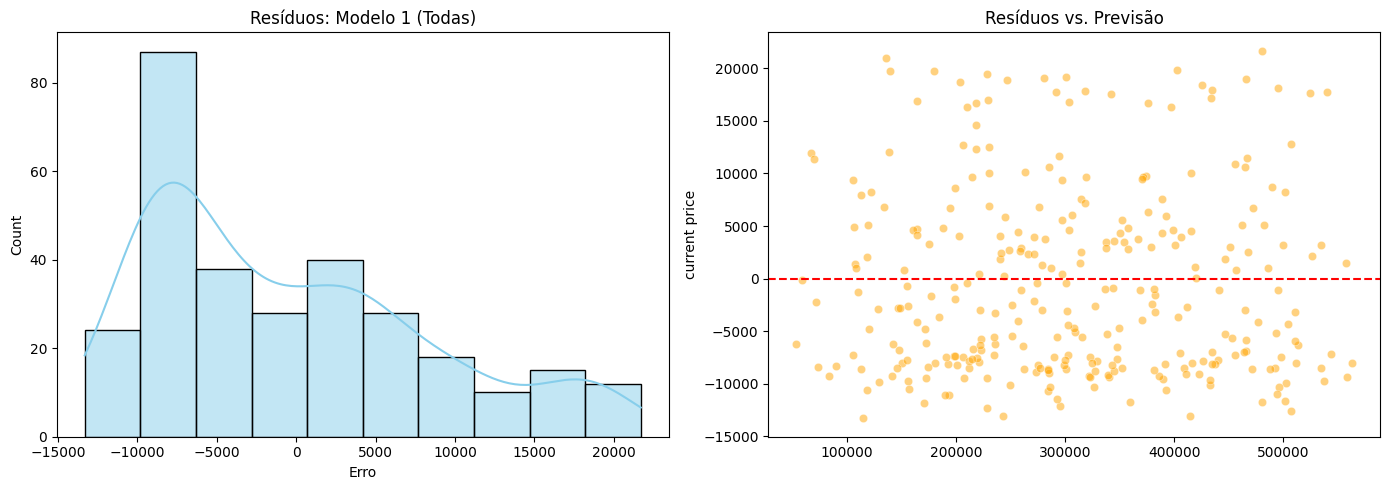

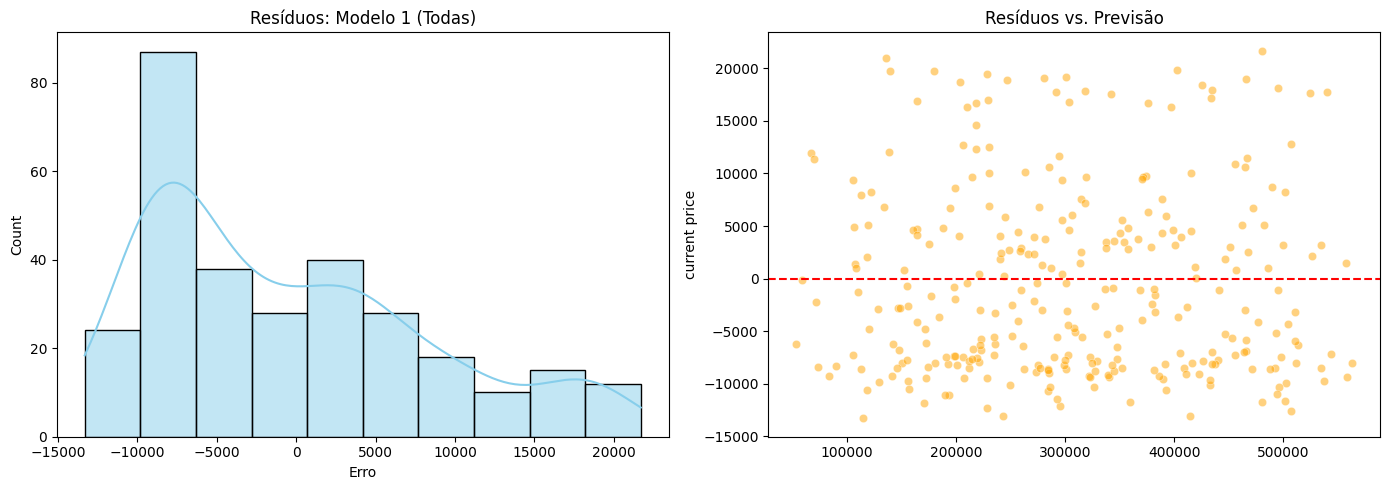

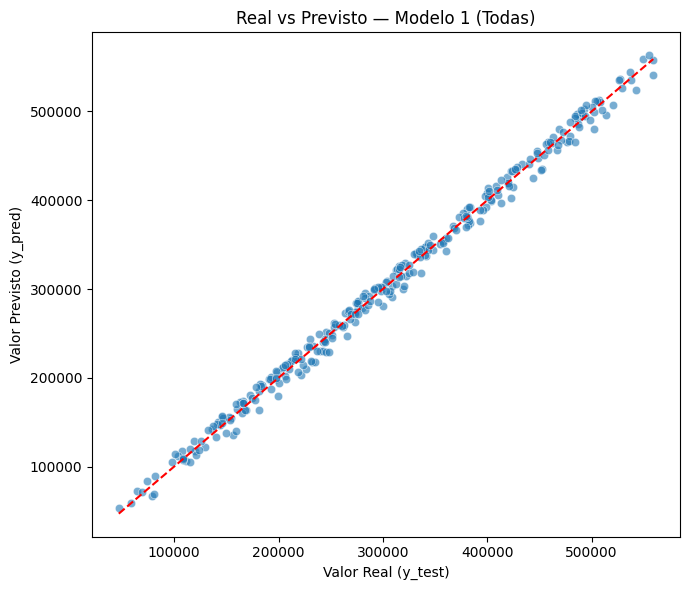


==================== Modelo 2 (Top 3) ====================

>> Análise de Multicolinearidade (VIF):
       Feature        VIF
1  on road now  75.581014
2  on road old  74.241725
0           km  12.185485

>> Performance do Modelo:
R² (Explicação): 0.9843
R² Ajustado (Para Comparação): 0.9842
RMSE (Erro Médio): 15590.26
Outliers detectados nos erros: 0 (0.00%)


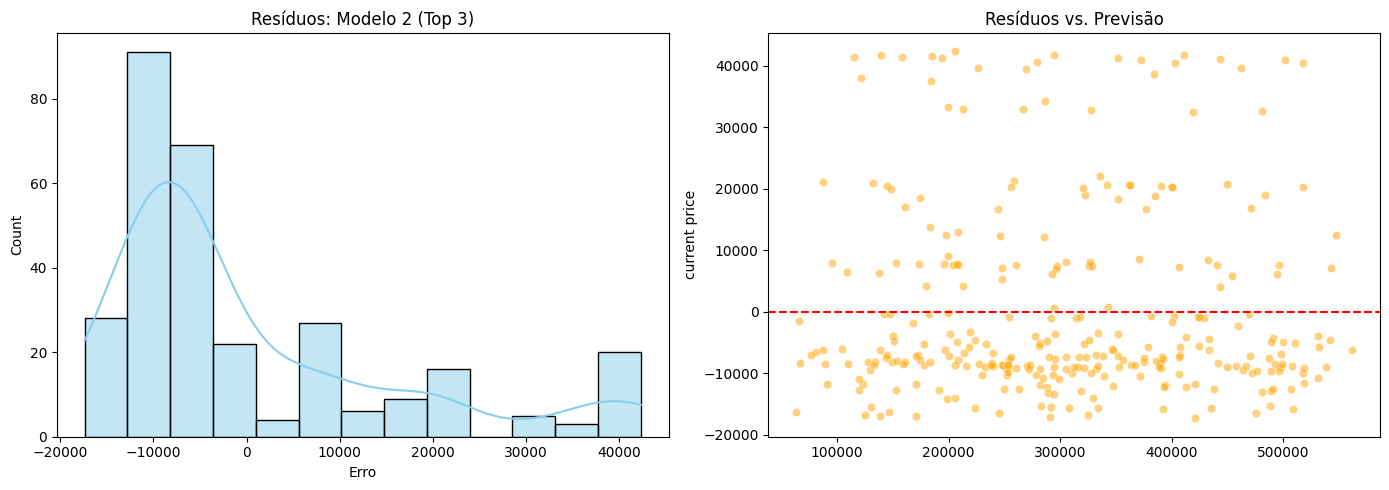

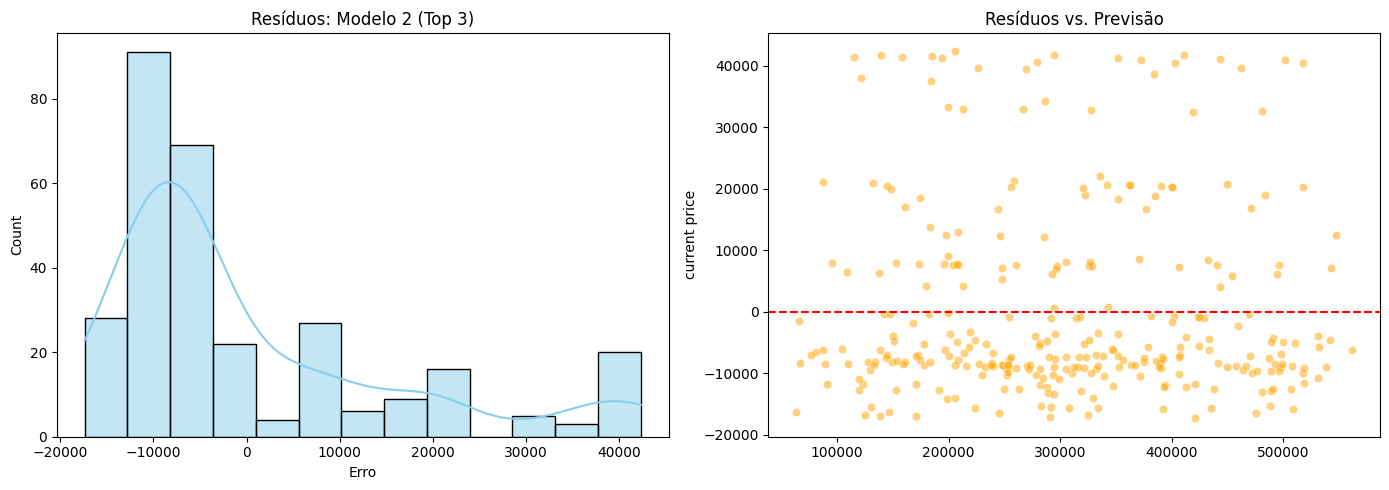

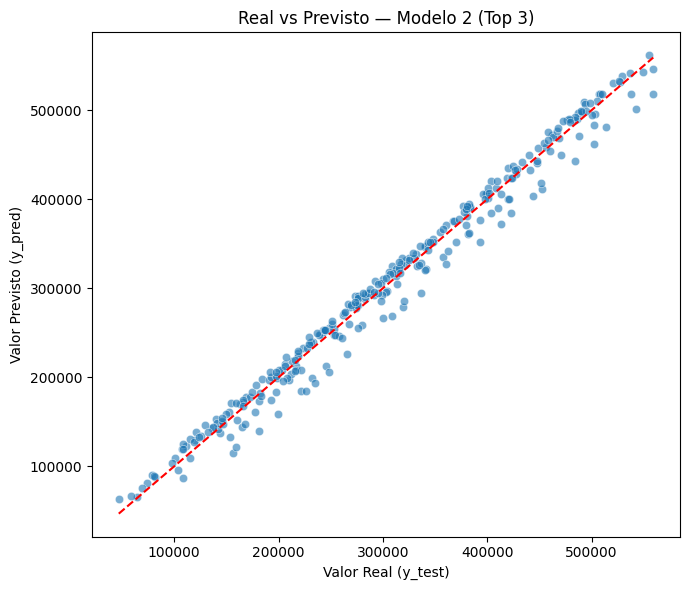


==================== Modelo 3 (Top 5) ====================

>> Análise de Multicolinearidade (VIF):
       Feature        VIF
1  on road now  80.775018
2  on road old  74.623892
0           km  12.189343
4       rating   5.472851
3    condition   4.851222

>> Performance do Modelo:
R² (Explicação): 0.9947
R² Ajustado (Para Comparação): 0.9946
RMSE (Erro Médio): 9073.64
Outliers detectados nos erros: 0 (0.00%)


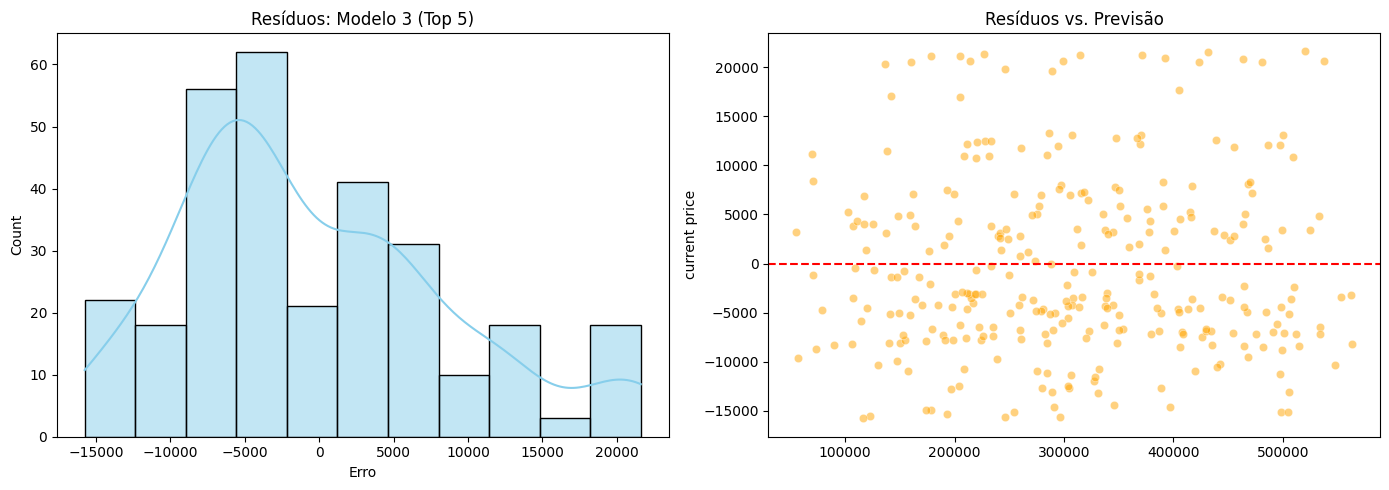

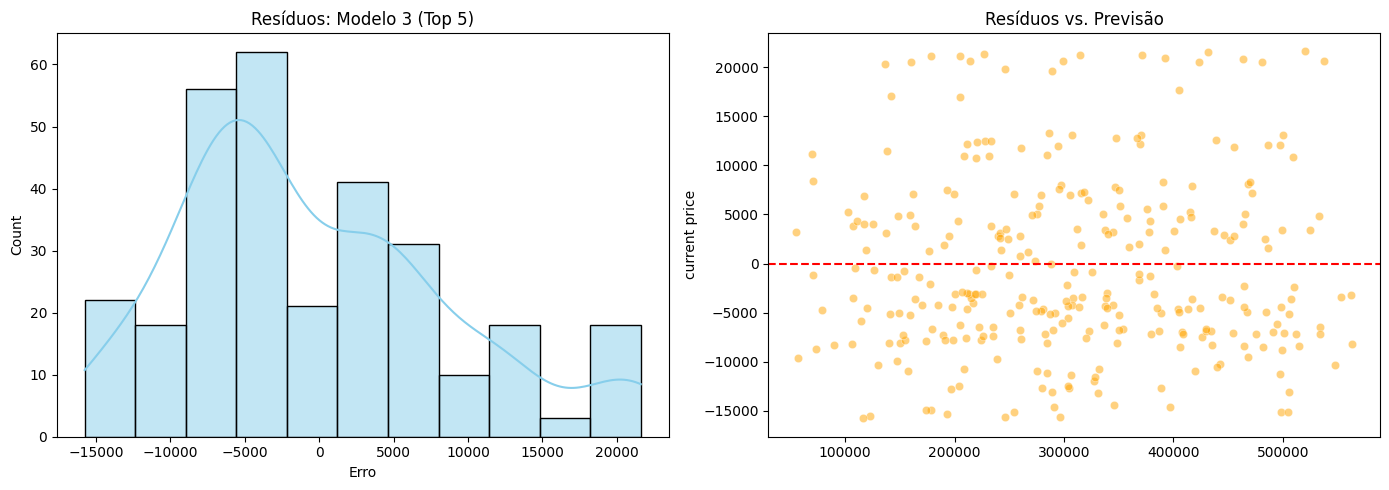

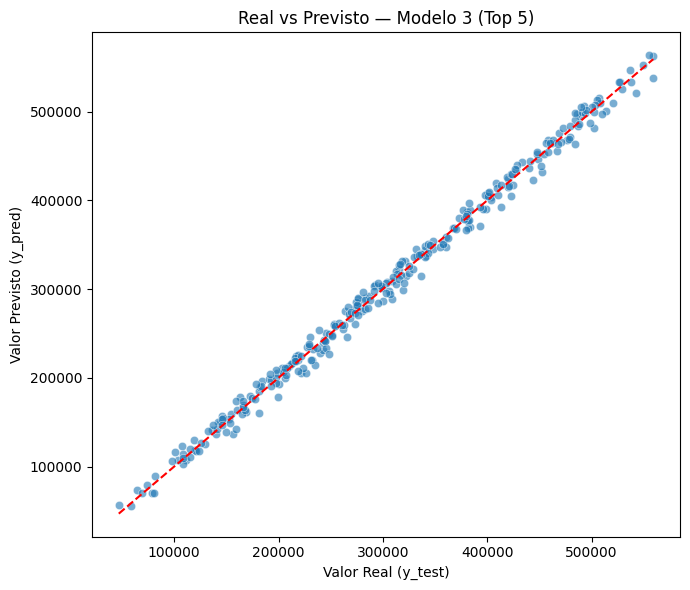

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

def treinar_modelo_completo(nome_modelo, lista_features, df_origem):
    print(f"\n{'='*20} {nome_modelo} {'='*20}")

    X = df_origem[lista_features]
    y = df_origem['current price']

    if len(lista_features) > 1:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        try:
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
            print("\n>> Análise de Multicolinearidade (VIF):")
            print(vif_data.sort_values(by="VIF", ascending=False))
        except:
            print("Não foi possível calcular VIF (possível divisão por zero ou dados constantes).")
    else:
        print("\n>> VIF não calculado (apenas 1 variável no modelo).")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    n = len(y_test)
    p = len(lista_features)
    r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    residuos = y_test - y_pred

    desvio_padrao_residuos = np.std(residuos)
    residuos_padronizados = residuos / desvio_padrao_residuos
    qtd_outliers = np.sum(np.abs(residuos_padronizados) > 3)
    perc_outliers = (qtd_outliers / len(residuos)) * 100

    print(f"\n>> Performance do Modelo:")
    print(f"R² (Explicação): {r2:.4f}")
    print(f"R² Ajustado (Para Comparação): {r2_ajustado:.4f}")
    print(f"RMSE (Erro Médio): {rmse:.2f}")
    print(f"Outliers detectados nos erros: {qtd_outliers} ({perc_outliers:.2f}%)")

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(residuos, kde=True, ax=ax[0], color='skyblue')
    ax[0].set_title(f'Resíduos: {nome_modelo}')
    ax[0].set_xlabel('Erro')
    
    sns.scatterplot(x=y_pred, y=residuos, ax=ax[1], alpha=0.5, color='orange')
    ax[1].axhline(y=0, color='red', linestyle='--')
    ax[1].set_title('Resíduos vs. Previsão')
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            color='red', linestyle='--')

    plt.xlabel("Valor Real (y_test)")
    plt.ylabel("Valor Previsto (y_pred)")
    plt.title(f"Real vs Previsto — {nome_modelo}")
    plt.tight_layout()
    plt.show()

    return modelo, r2_ajustado


print("Iniciando bateria de testes...")

modelo_todos, r2_adj_todos = treinar_modelo_completo("Modelo 1 (Todas)", features_todas, df_limpo)
modelo_top3, r2_adj_top3 = treinar_modelo_completo("Modelo 2 (Top 3)", features_top3, df_limpo)
modelo_top5, r2_adj_top5 = treinar_modelo_completo("Modelo 3 (Top 5)", features_top5, df_limpo)